<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/niko_code/BandGaps_nikodemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pymatgen
!pip install mp_api
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 8.3 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=5775737b43932332fea5ca387d0833b3353109fcaf4fd769e11f574b5787bf59
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8aadbbb17dc05f256756d8fd915
Successfully built bibtexparser
  Preparing metadata (se

In [ ]:
from pymatgen.ext.matproj import MPRester

# Direct assignment (not secure for sharing)
API_KEY = "nmtxcmhbUx34lX5wM3xNUMZKf7kooZCK"


with MPRester(API_KEY) as m:
    structure = m.get_structure_by_material_id("mp-505292")  # Replace with your desired material ID
    structure.to(fmt="cif", filename="structure.cif")

In [ ]:
print(structure)

Full Formula (Nd3 Cu4 Ge4)
Reduced Formula: Nd3(CuGe)4
abc   :   4.312348   6.703092   8.170079
angles: 114.218790 105.302245  90.000006
pbc   :       True       True       True
Sites (11)
  #  SP            a         b         c    magmom
---  ----  ---------  --------  --------  --------
  0  Nd     0.866635  0.366635  0.73327          0
  1  Nd    -0         0         0               -0
  2  Nd     0.133365  0.633365  0.26673          0
  3  Cu     0.665763  0.350591  0.331528         0
  4  Cu     0.334237  0.649409  0.668472         0
  5  Cu     0.334237  0.019063  0.668472         0
  6  Cu     0.665763  0.980937  0.331528         0
  7  Ge     0.5       0.312047  1                0
  8  Ge     0.216325  0.216325  0.432649         0
  9  Ge     0.783675  0.783675  0.567351         0
 10  Ge     0.5       0.687953  0                0


In [ ]:
print(structure.lattice)
print(structure.species)
print(structure.charge)
print(structure.cart_coords)
print(structure.atomic_numbers)
print(structure.distance_matrix) # 2D matrix for all the distance between the atoms,

4.159963 -0.000000 -1.136243
-0.752544 6.064166 -2.755179
-0.003600 0.006857 8.170076
[Element Nd, Element Nd, Element Nd, Element Cu, Element Cu, Element Cu, Element Cu, Element Ge, Element Ge, Element Ge, Element Ge]
0
[[ 3.32662206  2.22836472  3.99602104]
 [ 0.          0.          0.        ]
 [ 0.07719753  3.84265815  0.28263261]
 [ 2.50452287  2.12831387  0.98619755]
 [ 0.89929672  3.942709    3.2924561 ]
 [ 1.37366011  0.12018483  5.02917277]
 [ 2.03015948  5.95083804 -0.75051912]
 [ 1.84155323  1.89915926  6.74220992]
 [ 0.73555279  1.31479769  2.69296395]
 [ 2.6682668   4.75622518  1.5856897 ]
 [ 1.56226636  4.17186361 -2.46355627]]
(60, 60, 60, 29, 29, 29, 29, 32, 32, 32, 32)
[[0.         3.8538114  3.80473609 3.12168139 3.05383173 3.05383125
  3.12168083 3.13932461 3.04075688 3.55432234 3.13932449]
 [3.8538114  0.         3.8538114  3.43146329 3.43146329 3.43146382
  3.43146382 3.00403028 3.08573909 3.08573909 3.00403028]
 [3.80473609 3.8538114  0.         3.05383173 3.1216

# Querying Data using mp_api (newer querying version)

In [ ]:
from mp_api.client import MPRester

# Direct assignment (not secure for sharing)
API_KEY = "nmtxcmhbUx34lX5wM3xNUMZKf7kooZCK"

# For example, below is a query to find materials
# containing Si and O that have a band gap greater than 0.5 eV but less then 1.0 eV.
with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        elements=["Si", "O"], band_gap=(0.5, 1.0),
        fields=["material_id", "band_gap", "volume"]
    )


Retrieving SummaryDoc documents:   0%|          | 0/443 [00:00<?, ?it/s]

In [ ]:
example_doc = docs[0]
print(len(docs))

443


In [ ]:
with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        material_ids=["mp-505292"],
    )

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
example = docs[0]

In [ ]:
print(example.structure)

Full Formula (Nd3 Cu4 Ge4)
Reduced Formula: Nd3(CuGe)4
abc   :   4.312348   6.703092   8.170079
angles: 114.218790 105.302245  90.000006
pbc   :       True       True       True
Sites (11)
  #  SP            a         b         c    magmom
---  ----  ---------  --------  --------  --------
  0  Nd     0.866635  0.366635  0.73327          0
  1  Nd    -0         0         0               -0
  2  Nd     0.133365  0.633365  0.26673          0
  3  Cu     0.665763  0.350591  0.331528         0
  4  Cu     0.334237  0.649409  0.668472         0
  5  Cu     0.334237  0.019063  0.668472         0
  6  Cu     0.665763  0.980937  0.331528         0
  7  Ge     0.5       0.312047  1                0
  8  Ge     0.216325  0.216325  0.432649         0
  9  Ge     0.783675  0.783675  0.567351         0
 10  Ge     0.5       0.687953  0                0


# Using Statistics

In [ ]:
mean_atomic_number = np.mean(example.structure.atomic_numbers)
print(mean_atomic_number)

38.54545454545455


But this is dependent on various phases, so we use statistics based on geometrical arrangements.

In [ ]:
mean_distance_matrix = np.mean(example.structure.distance_matrix)
print(mean_distance_matrix)

2.9742554705156428


# Building a data set

Step (1) collecting the structures. Here we get the band_gaps for perovskites

In [ ]:
from mp_api.client import MPRester
from pymatgen.core.structure import Structure

API_KEY = "nmtxcmhbUx34lX5wM3xNUMZKf7kooZCK"

with MPRester(API_KEY) as mpr:
    # Search for materials with formula ABC3 in ternary oxides
    docs = mpr.materials.summary.search(
        formula="ABC3",
    )

Retrieving SummaryDoc documents:   0%|          | 0/4700 [00:00<?, ?it/s]

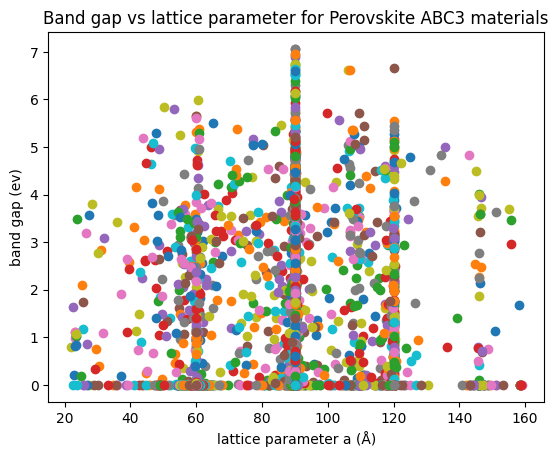

In [ ]:
for i in range(len(docs)):
  lattice = docs[i].structure.lattice
  bandgap = docs[i].band_gap
  plt.plot(lattice.gamma, bandgap, 'o')
plt.xlabel('lattice parameter a (Å)')
plt.ylabel('band gap (ev)')
plt.title(f'Band gap vs lattice parameter for Perovskite ABC3 materials')
plt.savefig("bandgap all.png")

In [ ]:
# from mp_api.client import MPRester
# from pymatgen.core.structure import Structure

# API_KEY = "nmtxcmhbUx34lX5wM3xNUMZKf7kooZCK"

# with MPRester(API_KEY) as mpr:
#     # Search for materials with formula ABC3 in ternary oxides
#     docs = mpr.materials.summary.search(
#         formula="ABC3",
#         fields=["material_id"]
#     )

#     # # Fetch structures and save as CIFs
#     # for mpid in mpids:
#     #     # Get structure object
#     #     structure = mpr.materials.structure.get_structure_by_material_id(mpid)

#     #     # Save to CIF file
#     #     filename = f"{mpid}.cif"
#     #     structure.to(filename=filename, fmt="cif")
#     #     print(f"Saved {filename}")


# with MPRester(API_KEY) as m:
#     structure = m.get_structure_by_material_id("mp-505292")  # Replace with your desired material ID
#     structure.to(fmt="cif", filename="structure.cif")

#     for i in range(len(example_docs)):
#     lattice = example_docs[i].structure.lattice
#     bandgap = example_docs[i].band_gap
#     plt.plot(lattice.gamma, bandgap, 'o')
# plt.xlabel('lattice parameter a (Å)')
# plt.ylabel('band gap (ev)')
# plt.title(f'Band gap vs lattice parameter all materials')
# plt.savefig("bandgap all.png")


In [ ]:
docs[0].structure.lattice

Lattice
    abc : 3.8586338700000002 3.8586338700000002 3.8586338700000002
 angles : 90.0 90.0 90.0
 volume : 57.45141323768982
      A : np.float64(3.8586338700000002) np.float64(-0.0) np.float64(0.0)
      B : np.float64(-0.0) np.float64(3.8586338700000002) np.float64(0.0)
      C : np.float64(-0.0) np.float64(-0.0) np.float64(3.8586338700000002)
    pbc : True True True

Step (2) pre-processing the data

In [ ]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
import pandas as pd
import numpy as np

def descriptors(docs_file):

    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []


    structure = docs_file.structure

    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        # e17 +=[e.mineral_hardness ]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = structure.volume

    volume_per_atom = V / numElements

    atom_volume = 0
    for e in structure.species:
        atom_volume += 4/3*np.pi*e.average_ionic_radius**3
    empty_volume = V - atom_volume

    descriptors_list = atomic_numbers +\
        [volume_per_atom] +\
        [empty_volume] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list
    return descriptors_list

In [ ]:
# descriptors(docs[2])

In [ ]:
band_gaps = []
dataset = []

counter = 0
for r in docs:
    bg = r.band_gap

    dataset += [descriptors(r)]
    band_gaps += [bg]
    print(counter)
    counter += 1

dataset_df = pd.DataFrame(dataset)


<ipython-input-17-627054907b0f>:75: UserWarning: No data available for electrical_resistivity for Ac
  e2 += [e.electrical_resistivity]
<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Ac
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Ac
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Ac
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ac
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Ac
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for Ac
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for Ac
  e14 += [e.

0
1
2
3
4
5
6
7
8
9
10
11
12
13


<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for S
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for S
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for S
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for S
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for S
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for S
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for S
  e16 += [e.rigidity_modulus]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for S
  e18 += [e.vickers_hardness]
<ip

14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Au
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Au
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Bi
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Bi
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Bi
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Bi
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for C
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_

40
41
42
43
44
45
46


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Ge
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Ge
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ge
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Ge
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for Ge
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for Ge
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for Ge
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for Ge
  e16 += [e.rigidity_modul

47
48
49
50
51
52
53
54
55


<ipython-input-17-627054907b0f>:75: UserWarning: No data available for electrical_resistivity for N
  e2 += [e.electrical_resistivity]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for N
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for N
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for N
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for N
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for N
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for N
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for N
  e16 += [e.rigidity_modulus]
<

56
57
58
59
60
61


<ipython-input-17-627054907b0f>:75: UserWarning: No data available for electrical_resistivity for Se
  e2 += [e.electrical_resistivity]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Se
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Se
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Se
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:92: UserWarning: No data available for coefficient_of_linear_thermal_expansion for Se
  e20 += [e.coefficient_of_linear_thermal_expansion]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Ru
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ru
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data

62
63
64
65
66
67
68
69


<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Sn
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Sn
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Te
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Te
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Te
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Te
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:92: UserWarning: No data available for coefficient_of_linear_thermal_expansion for Te
  e20 += [e.coefficient_of_linear_thermal_expansion]


70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Co
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Co
  e11 += [e.superconduction_temperature]


89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


<ipython-input-17-627054907b0f>:75: UserWarning: No data available for electrical_resistivity for H
  e2 += [e.electrical_resistivity]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for H
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for H
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for H
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for H
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for H
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for H
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for H
  e16 += [e.rigidity_modulus]
<

110
111
112
113
114
115
116
117
118
119
120
121
122
123


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for In
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for In
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for In
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for In
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for In
  e16 += [e.rigidity_modulus]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for In
  e18 += [e.vickers_hardness]


124
125
126
127
128
129
130
131


<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ir
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Mo
  e10 += [e.critical_temperature]


132
133
134
135
136
137
138
139
140
141
142
143


<ipython-input-17-627054907b0f>:75: UserWarning: No data available for electrical_resistivity for F
  e2 += [e.electrical_resistivity]
<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for F
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for F
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for F
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for F
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for F
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for F
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for F
  e15 += [e.brinell_hardness]


144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Tl
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Tl
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Tl
  e18 += [e.vickers_hardness]


166
167
168
169
170
171
172


<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for W
  e10 += [e.critical_temperature]


173
174
175
176
177
178
179
180
181
182
183


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Os
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Os
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for Os
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for Os
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Os
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Ba
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Ba
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ba
  e10 += [e.critical_temperature]
<ipython-input-17-6

184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Li
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Li
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Li
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for Li
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Li
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Na
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Na
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Na
  e11 += [e.superconducti

216
217
218
219
220
221
222
223
224
225
226
227


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Be
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Be
  e10 += [e.critical_temperature]


228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Ca
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ca
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Ca
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Ca
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Cd
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Cd
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Ce
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ce
  e10 

258
259
260
261
262
263
264
265
266


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Dy
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Dy
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Dy
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Er
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Er
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Er
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Eu
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivit

267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Hf
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Hf
  e10 += [e.critical_temperature]


292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Nb
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Nb
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Nd
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Nd
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Nd
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Np
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Np
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Np
  e6 += [e.poissons_

319
320
321
322
323
324
325
326
327
328
329
330
331
332


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Pr
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Pr
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Pr
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Pu
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Pu
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Pu
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for Pu
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for

333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371


<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Sr
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Sr
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Sr
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Sr
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for Sr
  e13 += [e.bulk_modulus]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for Sr
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for Sr
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Sr
  e18 += [e.vickers_

372
373
374
375
376


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Th
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Th
  e10 += [e.critical_temperature]


377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395


<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Tm
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Tm
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Tm
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Tm
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for U
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for U
  e10 += [e.critical_temperature]


396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Yb
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Yb
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Yb
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Zn
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Zn
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Zr
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Zr
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:85: UserWarning: No data available for bulk_modulus for Zr
  e13 

412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429


<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Hg
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for Hg
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for Hg
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for Hg
  e16 += [e.rigidity_modulus]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Hg
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:91: UserWarning: No data available for density_of_solid for Hg
  e19 += [e.density_of_solid]
<ipython-input-17-627054907b0f>:92: UserWarning: No data available for coefficient_of_linear_thermal_expansion for Hg
  e20 += [e.coefficient_of_linear_thermal_expansion]


430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Ho
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Ho
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Ho
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for La
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for La
  e10 += [e.critical_temperature]


553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Y
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Y
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Y
  e18 += [e.vickers_hardness]


697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814


<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Lu
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Lu
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Lu
  e10 += [e.critical_temperature]


815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942


<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Cs
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Cs
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Cs
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Cs
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for Cs
  e16 += [e.rigidity_modulus]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Cs
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:92: UserWarning: No data available for coefficient_of_linear_thermal_expansion for Cs
  e20 += [e.coefficient_of_linear_thermal_expansion]


943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Sm
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Sm
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Sm
  e11 += [e.superconduction_temperature]


1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for K
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for K
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for K
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:86: UserWarning: No data available for youngs_modulus for K
  e14 += [e.youngs_modulus]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for K
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:92: UserWarning: No data available for coefficient_of_linear_thermal_expansion for K
  e20 += [e.coefficient_of_linear_thermal_expansion]


1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Gd
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Gd
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for Gd
  e15 += [e.brinell_hardness]


2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133


<ipython-input-17-627054907b0f>:76: UserWarning: No data available for velocity_of_sound for Pm
  e3 += [e.velocity_of_sound]
<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Pm
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:82: UserWarning: No data available for critical_temperature for Pm
  e10 += [e.critical_temperature]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Pm
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:87: UserWarning: No data available for brinell_hardness for Pm
  e15 += [e.brinell_hardness]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Pm
  e18 += [e.vickers_hardness]


2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333


<ipython-input-17-627054907b0f>:77: UserWarning: No data available for reflectivity for Rb
  e4 += [e.reflectivity]
<ipython-input-17-627054907b0f>:78: UserWarning: No data available for poissons_ratio for Rb
  e6 += [e.poissons_ratio]
<ipython-input-17-627054907b0f>:83: UserWarning: No data available for superconduction_temperature for Rb
  e11 += [e.superconduction_temperature]
<ipython-input-17-627054907b0f>:88: UserWarning: No data available for rigidity_modulus for Rb
  e16 += [e.rigidity_modulus]
<ipython-input-17-627054907b0f>:90: UserWarning: No data available for vickers_hardness for Rb
  e18 += [e.vickers_hardness]
<ipython-input-17-627054907b0f>:92: UserWarning: No data available for coefficient_of_linear_thermal_expansion for Rb
  e20 += [e.coefficient_of_linear_thermal_expansion]


2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185


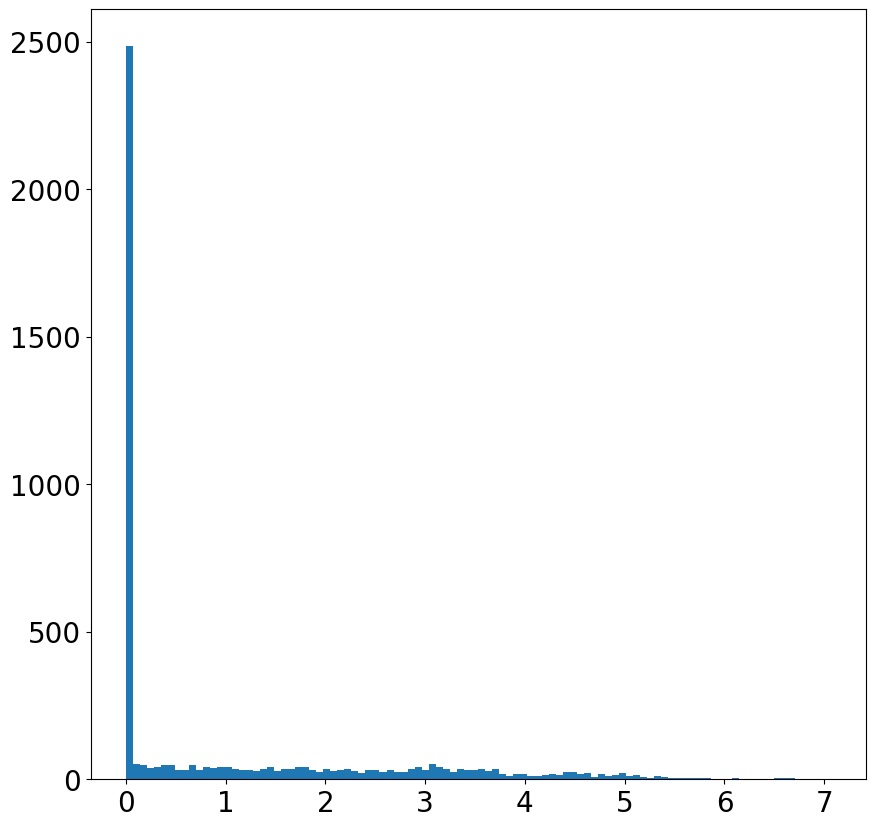

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10,10))
plt.hist(band_gaps, bins=100)
plt.savefig("band_gaps.png")

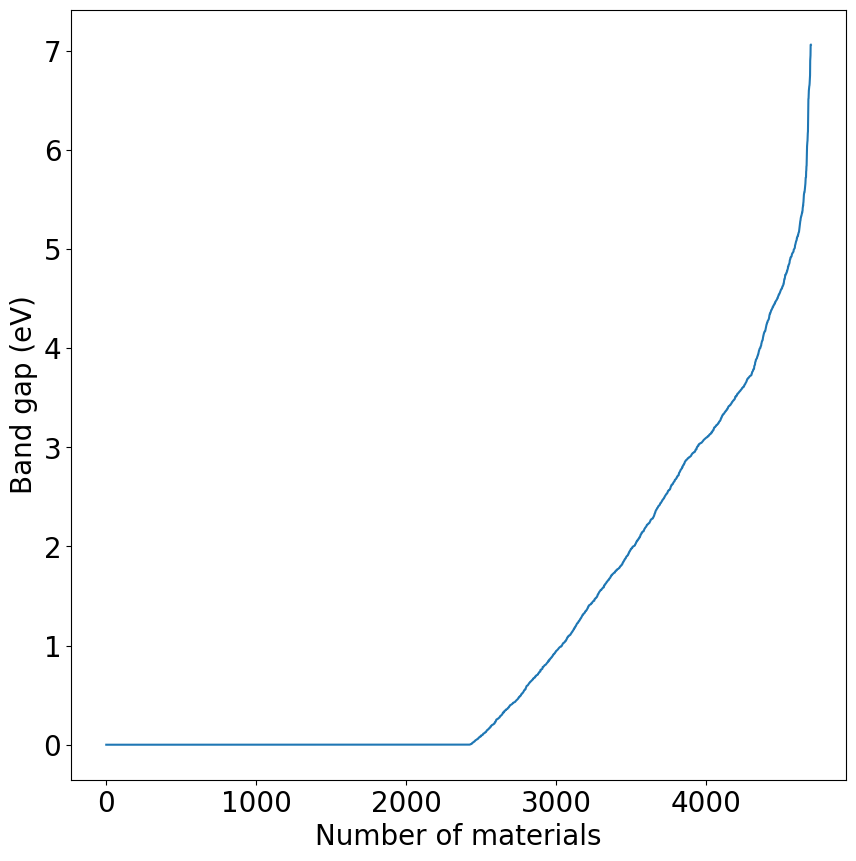

In [ ]:
band_gaps_sorted =sorted(band_gaps)

plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.savefig("band_gaps_sorted.png")
plt.xlabel("Number of materials")
plt.ylabel("Band gap (eV)")
plt.show()

Prepare the dataset (normalize and scale)

In [ ]:
# Step 1: Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset_df, band_gaps, test_size=0.2, random_state=None
)

# Step 2: Normalize the dataset using StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the scaler and fit it to the training data
scaler = StandardScaler().fit(X_train)

# Transform (scale) both training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Machine Learning Task

RF MAE	0.47330435325180753

RF R2	0.7487016902848913

XGBOOST MAE	0.473755806684494

XGBOOST R2	0.6981427669525146



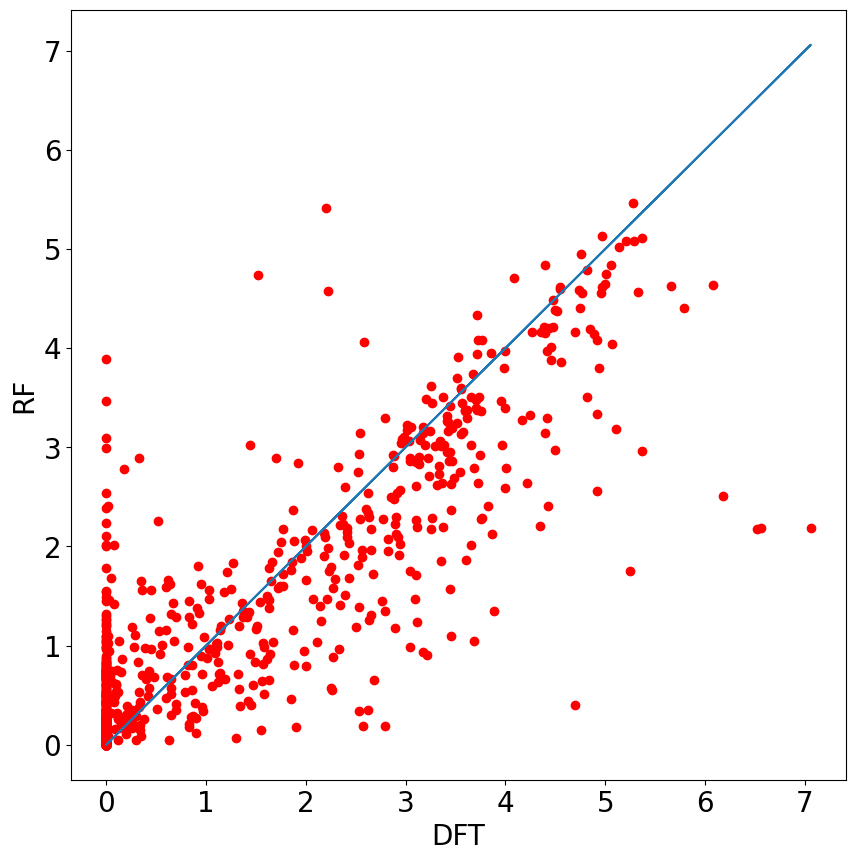

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# --- Random Forest Regression ---
regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MAE\t' + str(mean_absolute_error(y_test, y_predicted)) + '\n')
print('RF R2\t' + str(r2_score(y_test, y_predicted)) + '\n')

# Plotting
xPlot = y_test
yPlot = y_predicted

plt.figure(figsize=(10, 10))
plt.plot(xPlot, yPlot, 'ro')         # red dots
plt.plot(xPlot, xPlot)               # reference line y = x
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

# --- XGBoost Regression ---
regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MAE\t' + str(mean_absolute_error(y_test, y_predicted)) + '\n')
print('XGBOOST R2\t' + str(r2_score(y_test, y_predicted)) + '\n')
